In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1,
)

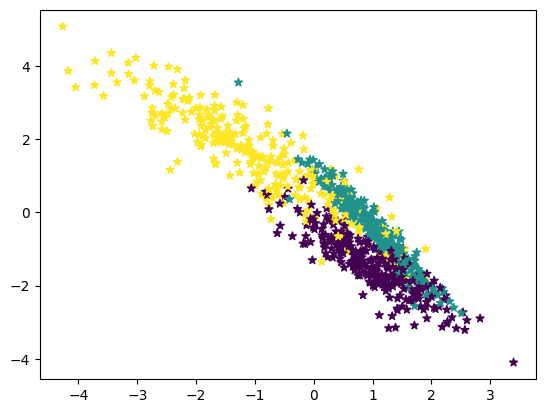

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [11]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [12]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


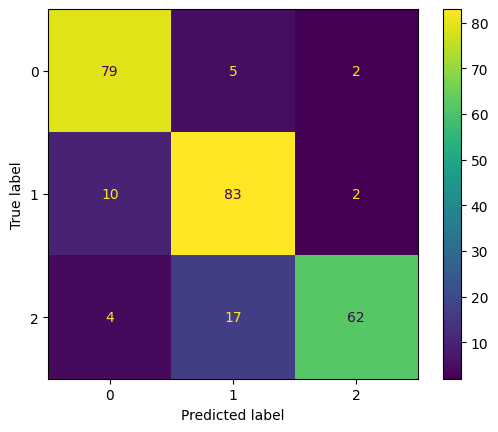

In [13]:
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [14]:
import pandas as pd


df = pd.read_csv('dataset_sunny.csv')
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


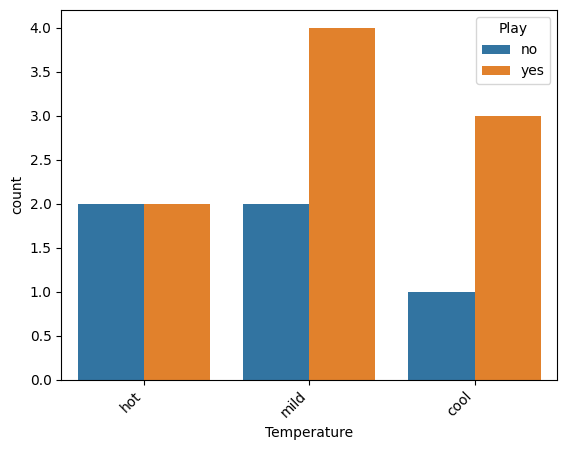

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="Temperature", hue="Play")
plt.xticks(rotation=45, ha="right")
plt.show()


In [17]:
pre_df = pd.get_dummies(df,columns=['Temperature'],drop_first=True)
pre_df.head()

,Outlook,Humidity,Windy,Play,Temperature_hot,Temperature_mild
0,sunny,high,False,no,True,False
1,sunny,high,True,no,True,False
2,overcast,high,False,yes,True,False
3,rainy,high,False,yes,False,True
4,rainy,normal,False,yes,False,False


In [18]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('Play', axis=1)
y = pre_df['Play']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("dataset_sunny.csv")

X = df.drop("Play", axis=1)
y = df["Play"]

le = LabelEncoder()
for col in X.columns:
    X[col] = le.fit_transform(X[col])

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


In [20]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


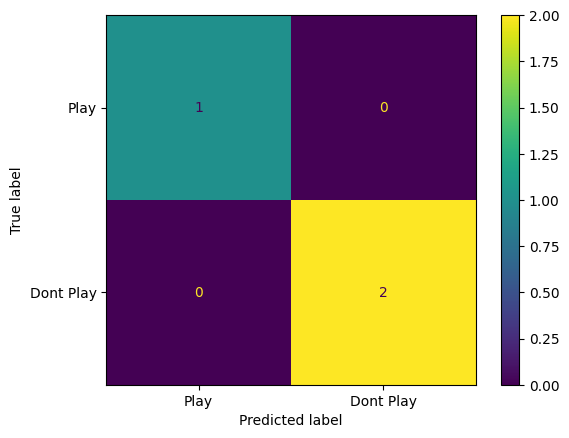

In [21]:
labels = ["Play", "Dont Play"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();